## Gazebo Data Exploration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.data_explorer import show_img, get_bbox_areas, plot_area_distribution, search_objects
from yolov7.utils.data_preparation import copytree_with_suffix
import matplotlib.pyplot as plt
import shutil
from pathlib import Path
import os

In [3]:
data_path = Path("../gazebo_data")
data_folders = os.listdir(data_path)

test_path = Path('../test').resolve()
if test_path.exists():
    shutil.rmtree(test_path)
# data_folders = ["asphalt_clear", "asphalt_cloudy", "gray_clear", "gray_cloudy", "gray_night", "gray_sunset"]
for data_folder in data_folders:
    copytree_with_suffix(data_path / data_folder / 'images', test_path / "images", f'_{data_folder}')
    copytree_with_suffix(data_path / data_folder / 'labels', test_path / "labels", f'_{data_folder}')

In [4]:
classes = ['Car', 'Pedestrian', 'Truck']

count, files = search_objects(classes, data_path = test_path / "labels", is_gazebo=True)

## Total Number of Objects

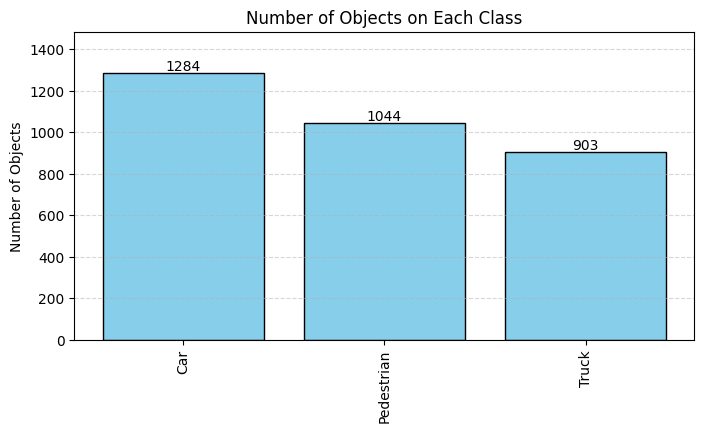

In [5]:
plt.figure(figsize=(8, 4))
plt.ylabel("Number of Objects")
plt.grid(ls="--", axis="y", alpha=0.5)
plt.xticks(rotation=90)
plt.ylim(0, max(list(count.values())) + 200)
# plt.yscale('log') 
bars = plt.bar(count.keys(), count.values(), color="skyblue", edgecolor="black")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.0f}", 
             ha='center', va='bottom', fontsize=10)
plt.title("Number of Objects on Each Class")
plt.show()

## Classes Viewer

In [6]:
img_path = test_path / "images"
label_path = test_path / "labels"

Opened D:\dev-workspace\IRO\test\images/0029_gray_sunset.jpeg
Opened D:\dev-workspace\IRO\test\images/0034_gray_night_rain.jpeg
Opened D:\dev-workspace\IRO\test\images/0045_gray_clear.jpeg
Opened D:\dev-workspace\IRO\test\images/0057_asphalt_cloudy_fog.jpeg


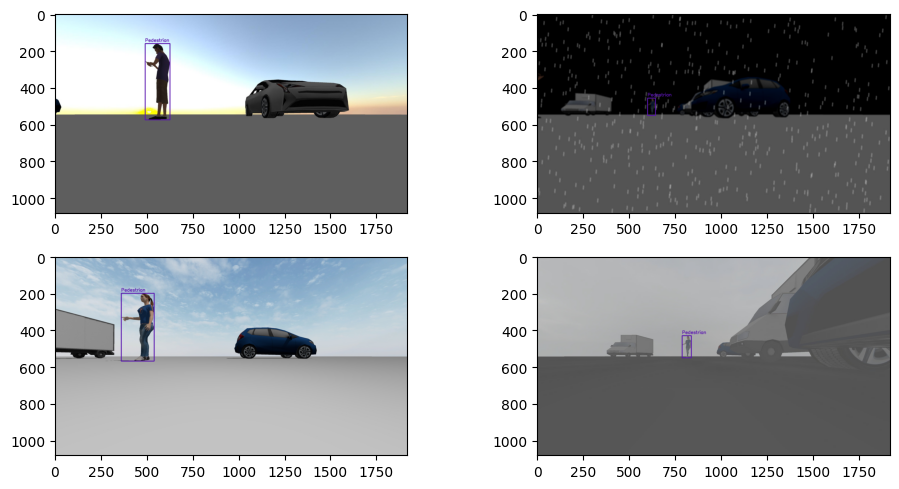

In [11]:
show_img(img_path, files['Pedestrian'], label_path, objects=["Pedestrian"], scale_factor=1, img_size=(1920, 1080), figsize=(10,5), plot_examples=4, is_gazebo=True)

Opened D:\dev-workspace\IRO\test\images/000_gray_sunset_rain.jpeg
Opened D:\dev-workspace\IRO\test\images/0029_gray_cloudy_rain.jpeg
Opened D:\dev-workspace\IRO\test\images/0050_gray_sunset_fog.jpeg
Opened D:\dev-workspace\IRO\test\images/0046_asphalt_clear_rain.jpeg


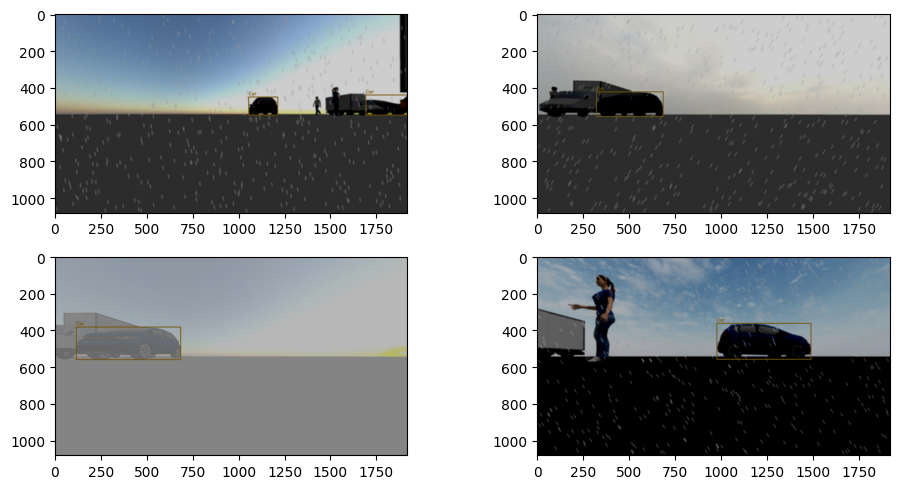

In [12]:
show_img(img_path, files['Car'], label_path, objects=["Car"], scale_factor=1, plot_examples=4, img_size=(1920, 1080), figsize=(10,5), is_gazebo=True)


Opened D:\dev-workspace\IRO\test\images/007_gray_clear_fog.jpeg
Opened D:\dev-workspace\IRO\test\images/0041_asphalt_clear.jpeg
Opened D:\dev-workspace\IRO\test\images/0017_asphalt_cloudy.jpeg
Opened D:\dev-workspace\IRO\test\images/0050_gray_sunset_fog.jpeg


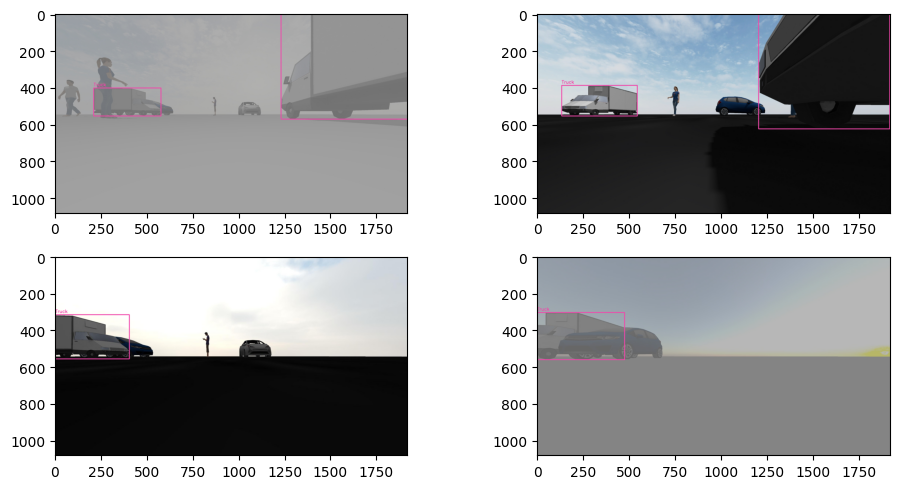

In [13]:
show_img(img_path, files['Truck'], label_path, objects=["Truck"], scale_factor=1, plot_examples=4,img_size=(1920, 1080), figsize=(10,5), is_gazebo=True)

## Distribution of Bounding Box Areas

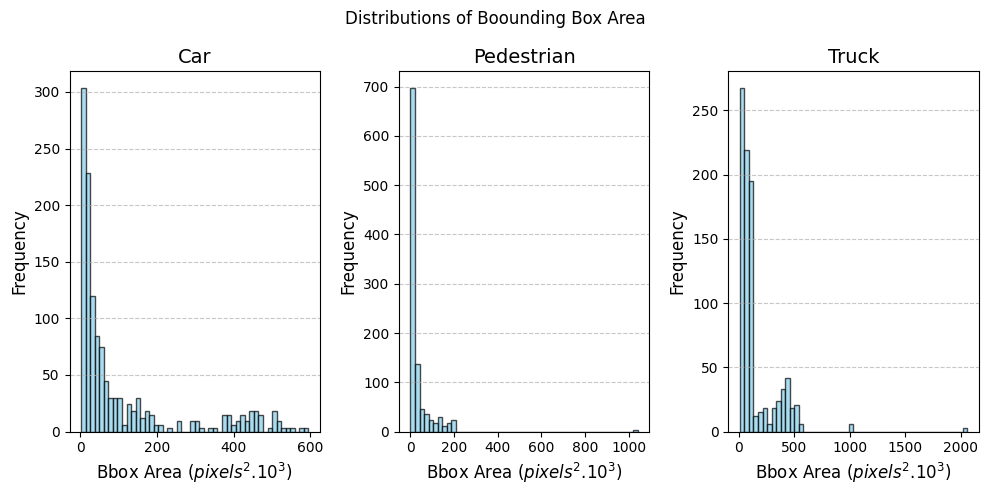

In [5]:
img_path = test_path / "images"
label_path = test_path / "labels"

kitti_classes = {'Car': 0, 
                 'Pedestrian': 1, 
                 'Van': 2, 
                 'Cyclist': 3, 
                 'Truck': 4, 
                 'Misc': 5, 
                 'Tram': 6, 
                 'Person_sitting': 7}
kitti_id_to_class = {v: n for n, v in kitti_classes.items()}

class_areas = get_bbox_areas(label_path, img_path, is_gazebo=True)
plot_area_distribution(class_areas, kitti_id_to_class, is_gazebo=True)